In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:99%;}
div.CodeMirror {font-family:Consolas; font-size:20pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

<font size='5' color='red'>ch02 영상 기본 연산</font>
# 1절. 영상기본정보

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img = cv2.imread('data/openCV/lena.jpg',
                # cv2.IMREAD_ANYCOLOR
                )
print('img.shape :', img.shape)
print('img[0,0] :', img[0,0])
print('dtype :', img.dtype)
print('img의 size :', img.size)

img.shape : (512, 512, 3)
img[0,0] : [127 136 226]
dtype : uint8
img의 size : 786432


In [8]:
img = cv2.imread('data/openCV/lena.jpg', cv2.IMREAD_GRAYSCALE)
height, width = img.shape
print(height, width)

512 512


In [11]:
# 짝수번째 행을 0으로 처리
for y in range(height):
    for x in range(width):
        if y%2==0:
            img[y, x] = 0

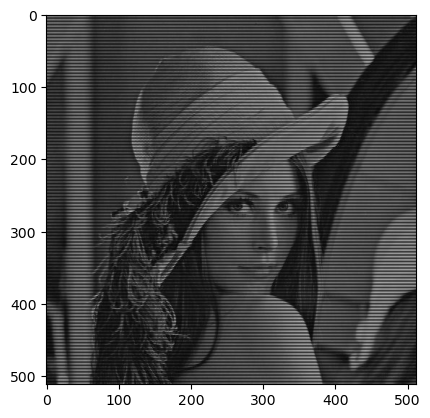

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.show()

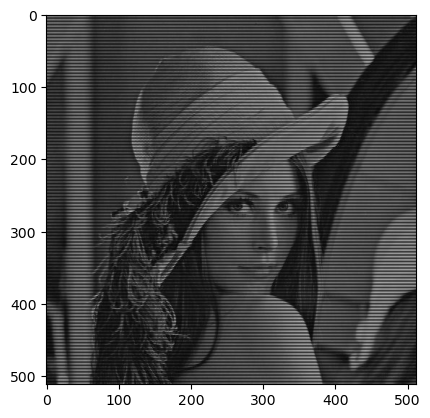

In [13]:
img = cv2.imread('data/openCV/lena.jpg', cv2.IMREAD_GRAYSCALE)
# 짝수번째 행은 0으로 처리
for y in range(height):
    if y%2 ==0:
        for x in range(width):
            img[y, x] = 0
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.show()

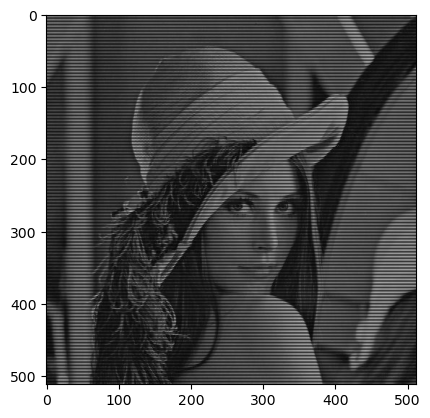

In [15]:
img = cv2.imread('data/openCV/lena.jpg', cv2.IMREAD_GRAYSCALE)
# 짝수번째 행은 0으로 처리
img[0::2, ...]=0
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.show()

# 2절. 기본연산
## 2.1 이미지 채널

In [17]:
img = cv2.imread('data/openCV/lena.jpg')
# b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
b, g, r = cv2.split(img)
print('img.shape :', img.shape)
print('b.shape :', b.shape)
print('g.shape :', g.shape)
print('r.shape :', r.shape)
print(np.mean(b), np.mean(g), np.mean(r))

img.shape : (512, 512, 3)
b.shape : (512, 512)
g.shape : (512, 512)
r.shape : (512, 512)
105.54556274414062 98.9676513671875 180.31714248657227


In [18]:
# 이미지의 빨간 채널만 활성화
img[:,:, [0,1]] = 0
cv2.imshow('red chanel', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 원본, B, G, R 채널 활성화
img = cv2.imread('data/openCV/lena.jpg')
cv2.imshow('img', img)

imgR = img.copy() #깊은 복사
imgR[:,:, [0,1]] = 0
cv2.imshow('red', imgR)

imgG = img.copy()
imgG[:,:, [0,2]] = 0
cv2.imshow('green', imgG)

imgB = img.copy()
imgB[:, :, [1, 2]] = 0
cv2.imshow('blue', imgB)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 2.2 크기 조절

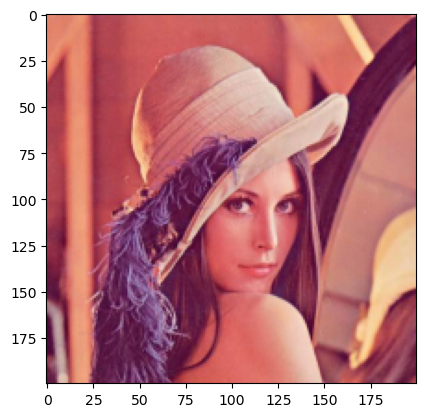

In [3]:
# 특정 pixel 길이로 변경
img = cv2.imread('data/openCV/lena.jpg')
height, width, chanel = img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = cv2.resize(img, dsize=(200,200), interpolation=cv2.INTER_AREA)
plt.imshow(dst)

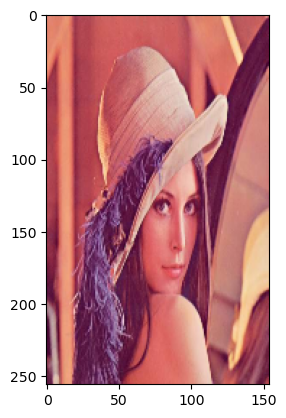

In [15]:
# 특정 비율로 조정
dst2 = cv2.resize(img, dsize=(0,0), fx=0.3, # 가로 사이즈 비율
                 fy=0.5, # 세로 사이즈 비율
                 interpolation=cv2.INTER_LINEAR 
                 )
plt.imshow(dst2)
plt.show()

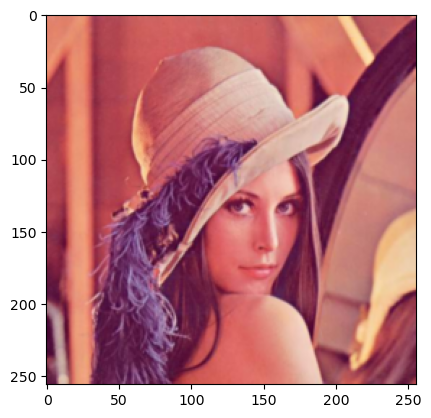

In [16]:
# 2배 축소
dst3 = cv2.pyrDown(img)
plt.imshow(dst3)
plt.show()

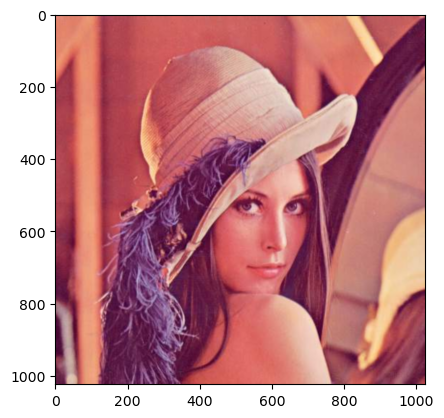

In [24]:
# 2배 확대
dst4 = cv2.pyrUp(img)
plt.imshow(dst4)
plt.show()

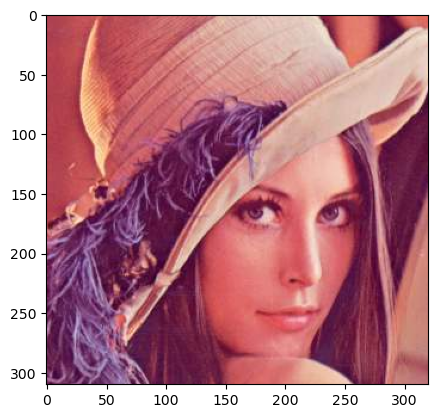

In [28]:
# 이미지 자르기
dst5 = img[100:410, 90:410]
plt.imshow(dst5)
plt.show()

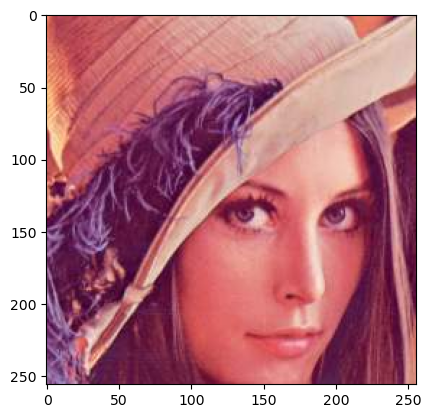

In [30]:
# 이미지의 센터만 추출
dst6 = img[int(height/4):int(height*3/4), int(width/4):int(width*3/4)]
plt.imshow(dst6)
plt.show()

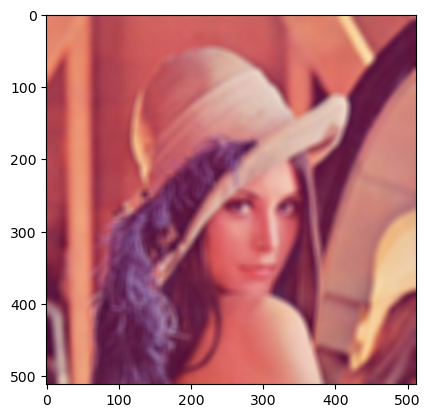

In [32]:
# blur 처리
dst7 = cv2.blur(img, (10,10))
plt.imshow(dst7)
plt.show()

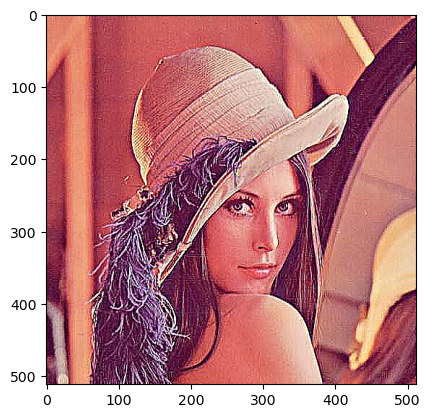

In [33]:
# 이미지를 선명하게
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])
dst8 = cv2.filter2D(img, -1, kernel)
plt.imshow(dst8)
plt.show()

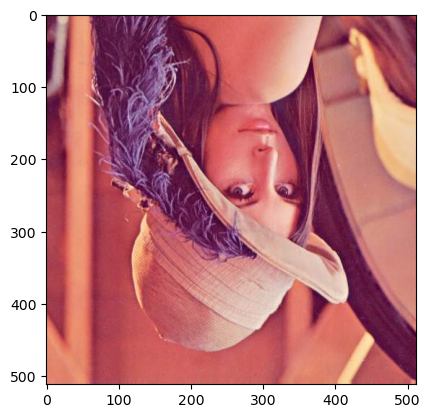

In [35]:
# 대칭(상하)
dst9 = cv2.flip(img, 0)
plt.imshow(dst9)
plt.show()

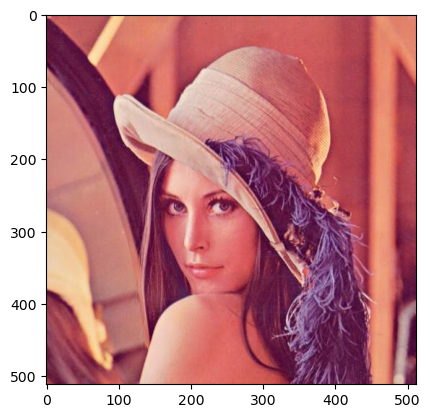

In [36]:
# 대칭(좌우)
dst9 = cv2.flip(img, 1)
plt.imshow(dst9)
plt.show()

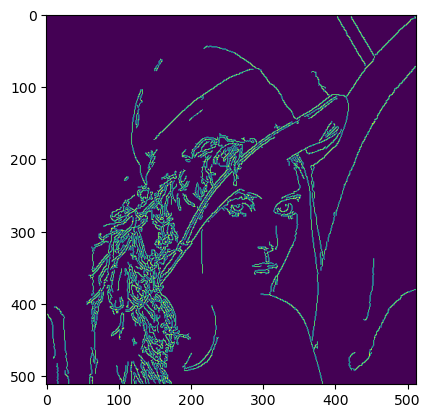

In [40]:
# 경계 추출
dst10 = cv2.Canny(img, 100, 300) # 100~300사이 임계치값만 추출
plt.imshow(dst10)
plt.show()

## 2.3 이미지 합치기

In [42]:
img1 = cv2.imread('data/openCV/ch2_flower1.jpg')
img2 = cv2.imread('data/openCV/ch2_flower2.jpg')
cv2.imshow('flower1', img1)
cv2.imshow('flower2', img2)
cv2.imshow('np.add', np.add(img1, img2))
cv2.imshow('cv2.add', cv2.add(img1, img2))

cv2.waitKey(0)
cv2.destroyAllWindows()